In [1]:
import numpy as np
import argparse
import time
import os
import sys
import pickle
from itertools import chain
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

from datasets import inputs
from sr_model.models.models import AnalyticSR, STDP_SR, OjaRNN, Linear
import configs
from eval import eval

device = 'cpu'

In [2]:
linear = Linear(64, lr=1E-1)

datasets = [ 
    inputs.Sim2DWalk(num_steps=20000, num_states=64)
    ]

linear_t_error, linear_m_error, \
    linear_T_row_norm, linear_T_col_norm = eval(
        linear, datasets
        )

In [3]:
net = OjaRNN(2, 0.4, ca3_kwargs={'start_valid':False, 'lr':1E-2})

datasets = [ 
    inputs.Sim2DWalk(num_steps=20000, num_states=64)
    ]

oja_t_error, oja_m_error,\
    oja_T_row_norm, oja_T_col_norm = eval(
        net, datasets
        )

In [4]:
save_path = '../trained_models/baseline/'
sr_t_error, sr_m_error, sr_T_row_norm, sr_T_col_norm = eval(
    save_path, datasets
    )

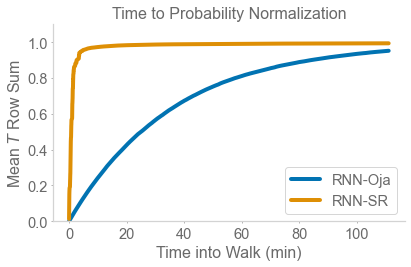

In [5]:
plt.figure()
oja_y = oja_T_row_norm[0]
sr_y = sr_T_row_norm[0]
oja_x = np.arange(oja_y.size)/configs.dt_to_sec/60
sr_x = np.arange(sr_y.size)/configs.dt_to_sec/60
plt.plot(oja_x, oja_y, label='RNN-Oja', linewidth=4)
plt.plot(sr_x, sr_y, label='RNN-SR', linewidth=4)
plt.legend()
plt.ylim(0, 1.1)
plt.xlabel('Time into Walk (min)')
plt.ylabel('Mean $T$ Row Sum')
plt.title('Time to Probability Normalization')
plt.tight_layout()
plt.savefig('1f_oja_norm_sum.png', dpi=300)
plt.show()

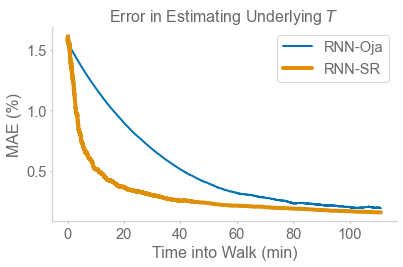

In [6]:
plt.figure()
oja_y = oja_t_error[0]*100
sr_y = sr_t_error[0]*100
oja_x = np.arange(oja_y.size)/configs.dt_to_sec/60
sr_x = np.arange(sr_y.size)/configs.dt_to_sec/60

plt.plot(oja_x, oja_y, label='RNN-Oja', linewidth=2)
plt.plot(sr_x, sr_y, label='RNN-SR', linewidth=4)
plt.legend()
plt.title('Error in Estimating Underlying $T$')
plt.ylabel('MAE (%)')
plt.xlabel('Time into Walk (min)')
plt.tight_layout()
plt.savefig('1f_oja_t_error.png', dpi=300)
plt.show()

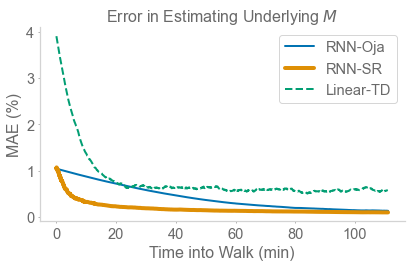

In [7]:
plt.figure()
oja_y = oja_m_error[0]*100
sr_y = sr_m_error[0]*100
oja_x = np.arange(oja_y.size)/configs.dt_to_sec/60
sr_x = np.arange(sr_y.size)/configs.dt_to_sec/60
lin_y = linear_m_error[0]*100
lin_x = np.arange(lin_y.size)/configs.dt_to_sec/60

plt.plot(oja_x, oja_y, label='RNN-Oja', linewidth=2)
plt.plot(sr_x, sr_y, label='RNN-SR', linewidth=4)
plt.plot(lin_x[::20], lin_y[::20], linestyle='--', label='Linear-TD', linewidth=2)
plt.legend()
plt.title('Error in Estimating Underlying $M$')
plt.ylabel('MAE (%)')
plt.xlabel('Time into Walk (min)')
plt.tight_layout()
plt.savefig('1f_oja_m_error.png', dpi=300)
plt.show()